<a href="https://colab.research.google.com/github/PD7-debug/Assignment-Mod-1/blob/main/Decision_Tree_Assignment_PW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Q1. What is a Decision Tree, and how does it work?

A Decision Tree is a flowchart-like structure used for classification and regression tasks. It splits the dataset into branches based on feature values and makes predictions at the leaf nodes.

### Q2. What are impurity measures in Decision Trees?

Common impurity measures in Decision Trees are Gini Impurity and Entropy. They measure the disorder in a dataset and help determine the best feature to split.

### Q3. What is the mathematical formula for Gini Impurity?

Gini Impurity formula: Gini = 1 - Σ(pᵢ²), where pᵢ is the probability of class i.

### Q4. What is the mathematical formula for Entropy?

Entropy formula: Entropy = -Σ(pᵢ * log₂(pᵢ)), where pᵢ is the probability of class i.

### Q5. What is Information Gain, and how is it used in Decision Trees?

Information Gain is the reduction in impurity (Entropy or Gini) caused by a split. It helps select the best feature to split the data.

### Q6. What is the difference between Gini Impurity and Entropy?

Gini is computationally simpler and often faster. Entropy is based on information theory. Both measure impurity but may choose different splits.

### Q7. What is the mathematical explanation behind Decision Trees?

A Decision Tree works by evaluating splits that reduce impurity the most. It continues until stopping criteria are met (e.g., depth or purity).

### Q8. What is Pre-Pruning in Decision Trees?

Pre-Pruning stops the tree growth early using constraints like max_depth, min_samples_split, etc., to avoid overfitting.

### Q9. What is Post-Pruning in Decision Trees?

Post-Pruning involves growing a full tree and then cutting back branches that do not improve generalization, using validation data or metrics.

### Q10. What is the difference between Pre-Pruning and Post-Pruning?

Pre-Pruning halts tree building before completion, while Post-Pruning trims it after building the full tree.

### Q11. What is a Decision Tree Regressor?

A Decision Tree Regressor predicts continuous numerical values by splitting the data to minimize variance (MSE) at each node.

### Q12. What are the advantages and disadvantages of Decision Trees?

**Advantages**: easy to interpret, no need for feature scaling, handles both numerical and categorical data. **Disadvantages**: overfitting, unstable, biased toward features with more levels.

### Q13. How does a Decision Tree handle missing values?

Decision Trees can handle missing values using surrogate splits or assigning the most frequent class from training splits.

### Q14. How does a Decision Tree handle categorical features?

Decision Trees handle categorical features by splitting on individual values or groups. Some implementations (like sklearn) require encoding.

### Q15. What are some real-world applications of Decision Trees?

Real-world applications include fraud detection, loan approval, disease diagnosis, churn prediction, and recommendation systems.

### Practical Q16. Write a Python program to train a Decision Tree Classifier on the Iris dataset and print the model accuracy.

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X, y = iris.data, iris.target
clf = DecisionTreeClassifier()
clf.fit(X, y)
print("Accuracy:", clf.score(X, y))

Accuracy: 1.0


### Practical Q17. Write a Python program to train a Decision Tree Classifier using Gini Impurity as the criterion and print the feature importances.

In [2]:
clf_gini = DecisionTreeClassifier(criterion='gini')
clf_gini.fit(X, y)
print("Gini Feature Importances:", clf_gini.feature_importances_)

Gini Feature Importances: [0.01333333 0.         0.56405596 0.42261071]


### Practical Q18. Write a Python program to train a Decision Tree Classifier using Entropy as the splitting criterion and print the model accuracy.

In [3]:
clf_entropy = DecisionTreeClassifier(criterion='entropy')
clf_entropy.fit(X, y)
print("Entropy Accuracy:", clf_entropy.score(X, y))

Entropy Accuracy: 1.0


### Practical Q19. Write a Python program to train a Decision Tree Regressor on a housing dataset and evaluate using Mean Squared Error (MSE).

In [4]:
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

data = fetch_california_housing()
X, y = data.data, data.target

reg = DecisionTreeRegressor()
reg.fit(X, y)
y_pred = reg.predict(X)
print("MSE:", mean_squared_error(y, y_pred))

MSE: 9.555001274479309e-32


### Practical Q20. Write a Python program to train a Decision Tree Classifier and visualize the tree using graphviz.

In [5]:
from sklearn.tree import export_graphviz
export_graphviz(clf, out_file="iris_tree.dot", feature_names=iris.feature_names,
                class_names=iris.target_names, filled=True)
print("DOT file saved as iris_tree.dot")

DOT file saved as iris_tree.dot


### Practical Q21. Write a Python program to train a Decision Tree Classifier with a maximum depth of 3 and compare its accuracy with a fully grown tree.

In [16]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Decision Tree with max_depth=3
tree_limited = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_limited.fit(X_train, y_train)

# Train fully grown Decision Tree (no max depth)
tree_full = DecisionTreeClassifier(random_state=42)
tree_full.fit(X_train, y_train)

# Predict and evaluate accuracy
y_pred_limited = tree_limited.predict(X_test)
y_pred_full = tree_full.predict(X_test)

accuracy_limited = accuracy_score(y_test, y_pred_limited)
accuracy_full = accuracy_score(y_test, y_pred_full)

print("Accuracy with max_depth=3:", accuracy_limited)
print("Accuracy with fully grown tree:", accuracy_full)


Accuracy with max_depth=3: 1.0
Accuracy with fully grown tree: 1.0


### Practical Q22. Write a Python program to train a Decision Tree Classifier using min_samples_split=5 and compare its accuracy with a default tree.

In [17]:
clf_default = DecisionTreeClassifier()
clf_custom = DecisionTreeClassifier(min_samples_split=5)
clf_default.fit(X, y)
clf_custom.fit(X, y)
print("Default Split Accuracy:", clf_default.score(X, y))
print("min_samples_split=5 Accuracy:", clf_custom.score(X, y))

Default Split Accuracy: 1.0
min_samples_split=5 Accuracy: 0.9866666666666667


### Practical Q23. Write a Python program to apply feature scaling before training a Decision Tree Classifier and compare its accuracy with unscaled data.

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf_scaled = DecisionTreeClassifier()
clf_scaled.fit(X_train_scaled, y_train)
clf_unscaled = DecisionTreeClassifier()
clf_unscaled.fit(X_train, y_train)

print("Scaled Accuracy:", clf_scaled.score(X_test_scaled, y_test))
print("Unscaled Accuracy:", clf_unscaled.score(X_test, y_test))

Scaled Accuracy: 1.0
Unscaled Accuracy: 1.0


### Practical Q24. Write a Python program to train a Decision Tree Classifier using One-vs-Rest (OvR) strategy for multiclass classification.

In [19]:
from sklearn.multiclass import OneVsRestClassifier

ovr_model = OneVsRestClassifier(DecisionTreeClassifier())
ovr_model.fit(X, y)
print("OvR Accuracy:", ovr_model.score(X, y))

OvR Accuracy: 1.0


### Practical Q25. Write a Python program to train a Decision Tree Classifier and display the feature importance scores.

In [12]:
print("Feature Importances:", clf.feature_importances_)

Feature Importances: [0.         0.01333333 0.06405596 0.92261071]


### Practical Q26. Write a Python program to train a Decision Tree Regressor with max_depth=5 and compare its performance with an unrestricted tree.

In [13]:
reg_restricted = DecisionTreeRegressor(max_depth=5)
reg_unrestricted = DecisionTreeRegressor()

reg_restricted.fit(X, y)
reg_unrestricted.fit(X, y)

from sklearn.metrics import mean_squared_error
print("MSE (max_depth=5):", mean_squared_error(y, reg_restricted.predict(X)))
print("MSE (Unrestricted):", mean_squared_error(y, reg_unrestricted.predict(X)))

MSE (max_depth=5): 0.4905640694739824
MSE (Unrestricted): 1.0548721407025157e-31


### Practical Q27. Write a Python program to train a Decision Tree Classifier, apply Cost Complexity Pruning (CCP), and visualize its effect on accuracy.

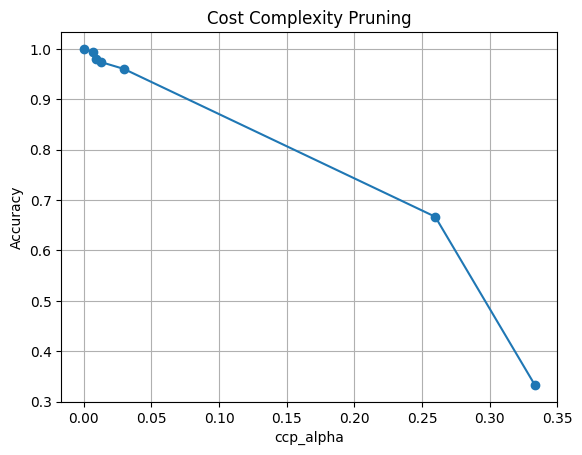

In [20]:
path = clf.cost_complexity_pruning_path(X, y)
ccp_alphas = path.ccp_alphas

import matplotlib.pyplot as plt
train_scores = []
for ccp_alpha in ccp_alphas:
    clf_ccp = DecisionTreeClassifier(ccp_alpha=ccp_alpha)
    clf_ccp.fit(X, y)
    train_scores.append(clf_ccp.score(X, y))

plt.plot(ccp_alphas, train_scores, marker='o')
plt.xlabel("ccp_alpha")
plt.ylabel("Accuracy")
plt.title("Cost Complexity Pruning")
plt.grid()
plt.show()

### Practical Q28. Write a Python program to train a Decision Tree Classifier and evaluate its performance using Precision, Recall, and F1-Score.

In [21]:
from sklearn.metrics import precision_score, recall_score, f1_score

y_pred = clf.predict(X)
print("Precision:", precision_score(y, y_pred, average='macro'))
print("Recall:", recall_score(y, y_pred, average='macro'))
print("F1-Score:", f1_score(y, y_pred, average='macro'))

Precision: 1.0
Recall: 1.0
F1-Score: 1.0


### Practical Q29. Write a Python program to train a Decision Tree Classifier and visualize the confusion matrix using seaborn.

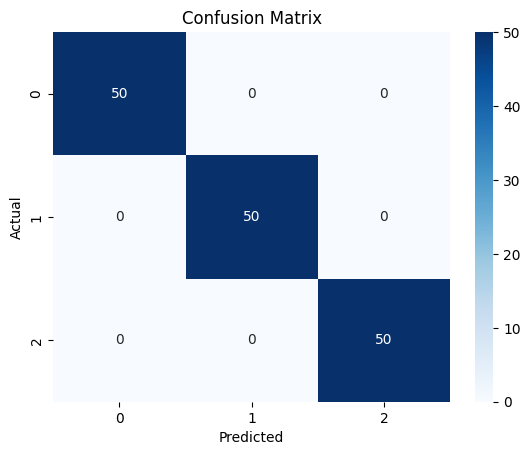

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

### Practical Q30. Write a Python program to train a Decision Tree Classifier and use GridSearchCV to find the optimal values for max_depth and min_samples_split.

In [23]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': [2, 3, 5], 'min_samples_split': [2, 4, 6]}
grid = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid.fit(X, y)
print("Best Params:", grid.best_params_)

Best Params: {'max_depth': 3, 'min_samples_split': 6}
